In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Importamos los datos
Por suerte pudimos importarlos desde sus respuestas directamente y no tuvimos que escribir a mano las preferencias.

In [76]:
df = pd.read_csv("/content/sample_data/Selección de Temas.csv") #cargo sus respuestas
df["Grupo"] = [9, 4, 8, 2, 7, 3, 1, 10, 6, 5] #lamentablemente el csv de rtas me dice su mail, pero no su grupo. hubo que ponerlo a mano -.-
df.index = df["Grupo"] #que el índice de mi df sea el grupo y ya
df.sort_index(inplace = True) #ordeno númericamente el df
#elimino las columnas de "grupo", "dirección de correo", "fecha" y "nombre"
df.drop(columns = ["Grupo", "Dirección de correo electrónico", "Fecha", "Nombre completo"], inplace = True)
df

,Primera opción:,Segunda opción:,Tercera opción:
Grupo,,,
1,6. Óptica 3 - Interferencia (Biprisma de Fresnel),2. Estacionarias 1 - tubo de Kundt,1. Ondas viajeras de ultrasonido
2,7. Óptica 4 - Interferencia (Michelson),6. Óptica 3 - Interferencia (Biprisma de Fresnel),3. Estacionarias 2 - cuerdas
3,4. Óptica 1 - Láser y polarización,7. Óptica 4 - Interferencia (Michelson),3. Estacionarias 2 - cuerdas
4,5. Óptica 2 - Lentes y microscopio,3. Estacionarias 2 - cuerdas,4. Óptica 1 - Láser y polarización
5,8. Óptica 5 - Difracción (Rendija y Babinet),6. Óptica 3 - Interferencia (Biprisma de Fresnel),4. Óptica 1 - Láser y polarización
6,5. Óptica 2 - Lentes y microscopio,4. Óptica 1 - Láser y polarización,6. Óptica 3 - Interferencia (Biprisma de Fresnel)
7,5. Óptica 2 - Lentes y microscopio,1. Ondas viajeras de ultrasonido,3. Estacionarias 2 - cuerdas
8,4. Óptica 1 - Láser y polarización,7. Óptica 4 - Interferencia (Michelson),5. Óptica 2 - Lentes y microscopio
9,6. Óptica 3 - Interferencia (Biprisma de Fresnel),4. Óptica 1 - Láser y polarización,3. Estacionarias 2 - cuerdas


In [77]:
temas = np.unique(np.concatenate(df.values)) #me quedo con todos los temas que eligieron (unique hace que no ser repitan)
temas_reducidos = [tema.split('.')[1].split('-')[0].strip() for tema in temas] #solo me quedo con el primer nombre (lo que está entre "." y "-")
#esto no se usa nunca, pero queda larguisimo el print si no
print(temas_reducidos)
print("")
print(len(temas)) #es clave que len(temas)= 8; si no elegían todos los temas ustedes mismos había que ponerlos a mano. gracias :)

['Ondas viajeras de ultrasonido', 'Estacionarias 1', 'Estacionarias 2', 'Óptica 1', 'Óptica 2', 'Óptica 3', 'Óptica 4', 'Óptica 5']

8


# ¿Qué temas fueron los más elegidos?

Esto no tiene mucho que ver, solo hago un histograma para ver que temas son más elegidos (igual esto no tiene en cuenta el orden en que eligieron cada tema).

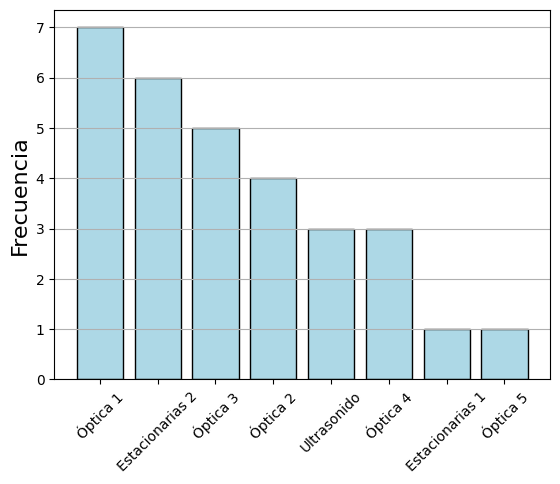

In [80]:
from collections import Counter

frecuencia_temas = Counter(np.concatenate(df.values)) #counter es basicamente un contador de cualquier formato.
#te devuelve un diccionario con el nombre de tu variable y la frecuencia con la que aparece. está bueno para hacer histogramas

df_ = pd.DataFrame(frecuencia_temas.items(), columns=["Tema", "Frecuencia"]) #armamos un df auxiliar para el histograma
df_ = df_.sort_values("Frecuencia", ascending = False)
short_temas = [tema.split('.')[1].split('-')[0].strip() for tema in df_["Tema"]] #idem al print. Queda horrible el xlabel si no acortamos el largo de los nombres
short_temas = ["Ultrasonido" if tema == "Ondas viajeras de ultrasonido" else tema for tema in short_temas] #reemplazo "Ondas viajeras de ultrasonido" por "Ultrasonido" ad hoc
df_["Tema"] = short_temas
plt.bar(df_["Tema"],df_["Frecuencia"], edgecolor = "k", color = "lightblue")
plt.xticks(rotation = 45)
plt.grid(axis="y")
# plt.xlabel("Temas", fontsize = 16)
plt.ylabel("Frecuencia", fontsize = 16)
plt.show()

# ¡A maximizar la felicidad!

(Acá empieza el verdadero hurto a Manu)

Ahora vamos a maximizar la felicidad.

Defino un diccionario que tiene (índice,puntaje), que pueden usar para jugar.

Por ejemplo, si el tema que asigno al grupo es el primero en la lista, sumo 1500 puntos.

In [59]:
dic_puntajes = {0: 1500, 1:1000, 2: 100}

Ahora vamos a simular.

En realidad este problema está definido, y podrían calcularse todas las combinaciones posibles, pero bueno, lo ~~pensamos~~ robamos así primero y listo. Si no me equivoco, la cantidad de maneras de asignar ~~10~~ 8 temas a
10 grupos es ~~10!~~ $\frac{8 \cdot 7}{2} \cdot \frac{10!}{4} $, así que son aprox. ~~3.6~~ 0.9 millones de combinaciones. Con ~~10~~ 20 millones de tiradas, deberíamos encontrar al menos una vez todas las combinaciones.

El código tarda ~~1 o 2~~ 6 minutos aprox.

---

El o la que me dice por qué -aun teniendo **menos** cantidad de combinaciones posibles que el problema de 10 temas para 10 grupos- se necesitan **más** iteraciones se gana 10 (diez) pesos.

No vale decir por la ineficiencia del programador
(no quiere decir que esto no sea cierto).

In [146]:
# Defino la cantidad de iteraciones
N = 20_000_000

# Hago una lista donde voy a guardar los puntajes de cada tirada, para hacer un histograma después
data = []
#uno el df en un único
opciones_grupos = {}
for i, row in df.iterrows():
    grupo = f"G{i}"
    opciones_grupos[grupo] = [row['Primera opción:'], row['Segunda opción:'], row['Tercera opción:']]

# Defino el valor máximo del estimador (puntaje máximo si quieren una palabra menos técnica)
estimador_max = 0

lista_de_temas= list(np.unique(temas)) #acuerdense que definimos "temas" en una de las primeras celdas
lista_estimadores = []
for i in range(N):
    # Defino puntaje = 0 para la tirada
    estimador = 0
    #elijo dos temas repetidos randoms. la lógica es la misma
    temas_repetidos = random.sample(lista_de_temas, 2)
    nueva_lista = lista_de_temas + temas_repetidos
    # Mezclo la lista. Esto modifica al objeto en el lugar, no hace falta que cree una nueva lista
    random.shuffle(nueva_lista)

    # Ahora le asigno un tema a cada grupo
    for n_grupo, tema in enumerate(nueva_lista):
        temas_grupo = opciones_grupos[f"G{n_grupo+1}"]
        # Sumo puntaje si el tema que fue asignado
        if tema in temas_grupo:
            estimador += dic_puntajes[temas_grupo.index(tema)]

    # Guardo el puntaje
    data.append(estimador)
    # Acá defino la condición para que se vaya actualizando cual es la lista de temas que maximiza el puntaje
    if estimador >= estimador_max:
        estimador_max = estimador
        lista_estimadores.append(estimador_max)
        mejores_temas = nueva_lista.copy() # ¡Importante hacer una copia, porque sino es la misma lista y va a cambiar con cada shuffle!
        short_named_temas = [tema.split('.')[1].strip() for tema in nueva_lista]
        # short_named_temas = ["Ultrasonido" if tema == "Ondas viajeras de ultrasonido" else tema for tema in short_named_temas]
        print(f"{round(i/N *100, 2)}%") #tqdm hecho en casa
        print(estimador, short_named_temas)

0.0%
4000 ['Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Óptica 1 - Láser y polarización', 'Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Ondas viajeras de ultrasonido', 'Óptica 5 - Difracción (Rendija y Babinet)', 'Estacionarias 2 - cuerdas', 'Óptica 4 - Interferencia (Michelson)', 'Óptica 4 - Interferencia (Michelson)', 'Estacionarias 1 - tubo de Kundt', 'Óptica 2 - Lentes y microscopio']
0.0%
4100 ['Estacionarias 1 - tubo de Kundt', 'Ondas viajeras de ultrasonido', 'Ondas viajeras de ultrasonido', 'Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Óptica 1 - Láser y polarización', 'Óptica 2 - Lentes y microscopio', 'Óptica 4 - Interferencia (Michelson)', 'Estacionarias 2 - cuerdas', 'Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Óptica 5 - Difracción (Rendija y Babinet)']
0.0%
7600 ['Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Estacionarias 1 - tubo de Kundt', 'Óptica 2 - Lentes y microscopio', 'Estacionarias 2 - cuerdas', 'Óptica 5 - Difracción (Rendija y Babinet

In [161]:
print("Lista de temas que maximizan la felicidad:")
short_named_temas = [tema.split('.')[1].strip() for tema in mejores_temas]
short_named_temas = ["Ultrasonido" if tema == "Ondas viajeras de ultrasonido" else tema for tema in short_named_temas]
print(short_named_temas)
print("")

#los ponemos lindos en un dataframe
grupos = [f"G{i}" for i in range (1,11)]
prioridad=[] #qué prioridad le tocó a cada uno
for i, tema in enumerate(mejores_temas):
    prioridad.append(opciones_grupos[f"G{i+1}"].index(tema)+1)
df__ = pd.DataFrame(zip(grupos, short_named_temas, prioridad), columns = ["Grupo", "Tema", "Prioridad"])
df__.reset_index(drop = True, inplace = True)
df__

Lista de temas que maximizan la felicidad:
['Estacionarias 1 - tubo de Kundt', 'Óptica 4 - Interferencia (Michelson)', 'Óptica 1 - Láser y polarización', 'Óptica 2 - Lentes y microscopio', 'Óptica 5 - Difracción (Rendija y Babinet)', 'Óptica 2 - Lentes y microscopio', 'Ultrasonido', 'Óptica 1 - Láser y polarización', 'Óptica 3 - Interferencia (Biprisma de Fresnel)', 'Estacionarias 2 - cuerdas']



,Grupo,Tema,Prioridad
0,G1,Estacionarias 1 - tubo de Kundt,2
1,G2,Óptica 4 - Interferencia (Michelson),1
2,G3,Óptica 1 - Láser y polarización,1
3,G4,Óptica 2 - Lentes y microscopio,1
4,G5,Óptica 5 - Difracción (Rendija y Babinet),1
5,G6,Óptica 2 - Lentes y microscopio,1
6,G7,Ultrasonido,2
7,G8,Óptica 1 - Láser y polarización,1
8,G9,Óptica 3 - Interferencia (Biprisma de Fresnel),1
9,G10,Estacionarias 2 - cuerdas,2


Ahora calculamos la felicidad, como el puntaje que tiene esta distribución de temas dividido el puntaje máximo posible (a cada grupo le tocó el tema que más quería).

In [160]:
# Lo calculo optimizado por si cambian alguna de las condiciones (esto es el puntaje de la primera opción multiplicado por el número de grupos)
puntaje_maximo_posible = dic_puntajes[0]*len(opciones_grupos.keys())
round(estimador_max/puntaje_maximo_posible,2)

0.9

Obtenemos una felicidad del ~~81%~~ 90%, bieeeeen.

Noten que este valor cambia fácilmente si cambiamos los puntos que asignamos a cada prioridad, ya que depende del puntaje máximo posible.

# Histograma de los puntajes

~~Por último hago un histograma de los puntajes para chusmear, no se si aporta mucha información pero bueno, se puede hacer y les puedo enseñar la escala logarítmica de paso (que les va a servir en labo 3, o debería).~~

Veamos en dónde se ubica el puntaje que obtuvimos respecto a la distribución generada por las iteraciones.

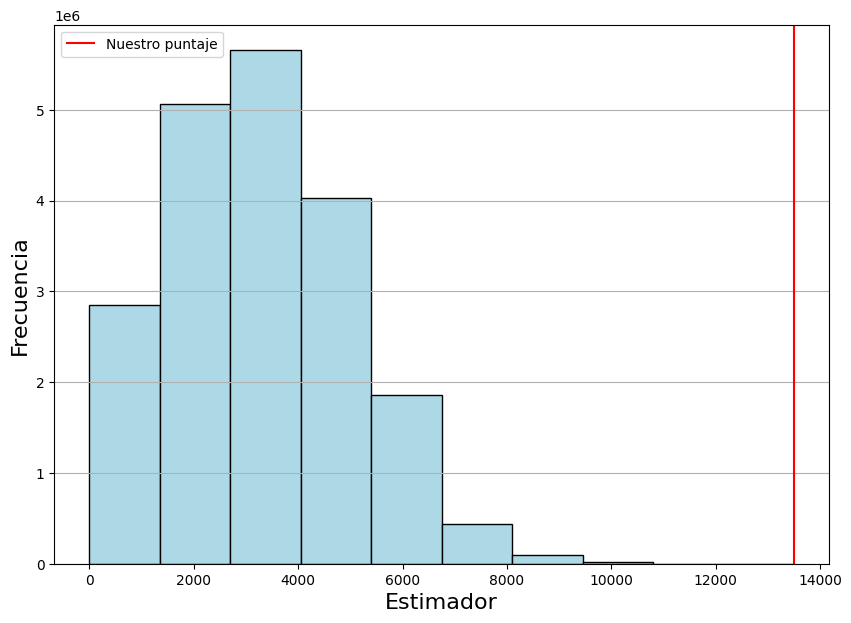

In [143]:
plt.figure(figsize = (10, 7))
plt.hist(data, edgecolor = "k", color = "lightblue")
plt.grid(axis = "y")
plt.axvline(estimador_max, color = "red", label = "Nuestro puntaje")
# plt.yscale("log") # La famosa escala logarítmica
plt.xlabel("Estimador", fontsize = 16)
plt.ylabel("Frecuencia", fontsize = 16)
plt.legend()
plt.show()

### De ninguna manera podemos afirmar que hayamos obtenido la máxima felicidad habida y por haber; lo que sí podemos afirmar es que tiramos 20 millones de veces "los dados" y no encontramos una felicidad más grande que esta. Es posible que dentro de esas 20 millones de tiradas no hayan salido el 100% de las 900 mil combinaciones que tenemos? Sí, claro. Yo diría que es un evento poco probable. Supongamos que no salieron el 100% de las combinaciones, ¿es posible que en aquellas que no salieron haya **además** una combinación que tenga un puntaje de felicidad más alto que el que obtuvimos? Sí, también. Aun así, me la juego a que la probabilidad es bajísima. La distribución nos habla un poco de eso, pero la verdad que no viene al caso; **disfruten de su felicidad**.

# A partir de acá es absolutamente todo robado de Manu. Lo dejamos porque está bueno

# Conclusiones
Como conclusiones finales, si bien yo no se los mostré, noten que se puede jugar muchísimo con los puntajes asignados y según como elijan la diferencia de puntaje entre las distintos prioridades de los temas, el orden de temas que máximice la "felicidad" puede cambiar.

En este caso, lo que quisimos hacer fue, primero que el estimador no opte por asignarle a un grupo un tema que no eligió, lo que hacemos asignando puntaje 0 en esos casos.
Por otro lado, queríamos que la mayoría de grupos tenga un tema entre sus primeras dos opciones, lo que logramos separando en un orden de magnitud el puntaje asignado a la segunda opción de la tercera opción.

Este problema tiene muchas formas de encarse, seguro hay alguna más óptima tanto computacional como lógicamente, para que haya una única opción que sea la mejor y no de lugar a discusiones.

¡Lo importante es probar y divertirse hallando los resultados! Como creo que hicimos la última clase mirando como se iban asignando los temas.


# Sabiduría pythonística

Por último, les dejo un código para demostrar amplia sabiduría pythonística ante sus camaradas que estudien física.

In [ ]:
# Si importamos esta librería
from tqdm import tqdm # De la librería tqdm importamos la función tqdm

# Y escribimos tdqm antes del iterable que estemos iterando (valga la redundancia)
for i in tqdm(range(100000000)):
    "Aguante la milanesa con tacc"
    "¡Gracias Dibu!"

# Podemos obtener un código con una barra que nos dice cuanto le quedan a nuestras mediciones (encima te dice cuantas iteraciones hace por segundo, muy bueno)

100%|██████████| 100000000/100000000 [00:29<00:00, 3340781.90it/s]


Esto es todo lo que tenía para contarles.

¡Espero que les sirva cuando automaticen en el futuro!

¡Les deseo mucha suerte y espero que disfruten la carrera!

**Por favor, googleen cuales son las siglas de TQDM y FIJI (de ImageJ).**

In [ ]:
# Les dejo esto de información para que sepan que existe y piensen en todo lo que se puede hacer (no importa si no lo entienden)

lista = [i+42 for i in range(20)]

print(lista)

[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
